#spotify multiclass genre classification
!pip install pandas    
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install sklearn
!pip install tensorflow

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn import metrics
import numpy as np
import tensorflow as tf
from sklearn.decomposition import PCA,KernelPCA,TruncatedSVD
from sklearn.manifold import Isomap,TSNE,MDS
import random
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
import warnings
warnings.simplefilter("ignore")

In [14]:
data=pd.read_csv('genres_v2.csv')
pd.set_option('display.max_colwidth', None)
data

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.059800,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/audio-analysis/2Vc6NJ9PW9gD9q343XFRKx,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.401000,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/audio-analysis/7pgJBLVz5VmnL7uGHmRj6p,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.013800,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/audio-analysis/0vSWgAlfpye0WCGeNmuNhy,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.023700,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/audio-analysis/0VSXnJqQkwuH2ei1nOQ1nu,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.217000,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/audio-analysis/4jCeguq9rMTlbMmPHuO7S3,123298,4,Dark Trap,Venom,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42300,0.528,0.693,4,-5.148,1,0.0304,0.031500,0.000345,0.1210,0.3940,...,46bXU7Sgj7104ZoXxzz9tM,spotify:track:46bXU7Sgj7104ZoXxzz9tM,https://api.spotify.com/v1/tracks/46bXU7Sgj7104ZoXxzz9tM,https://api.spotify.com/v1/audio-analysis/46bXU7Sgj7104ZoXxzz9tM,269208,4,hardstyle,NaN,20995.0,Euphoric Hardstyle
42301,0.517,0.768,0,-7.922,0,0.0479,0.022500,0.000018,0.2050,0.3830,...,0he2ViGMUO3ajKTxLOfWVT,spotify:track:0he2ViGMUO3ajKTxLOfWVT,https://api.spotify.com/v1/tracks/0he2ViGMUO3ajKTxLOfWVT,https://api.spotify.com/v1/audio-analysis/0he2ViGMUO3ajKTxLOfWVT,210112,4,hardstyle,NaN,20996.0,Greatest Hardstyle Playlist
42302,0.361,0.821,8,-3.102,1,0.0505,0.026000,0.000242,0.3850,0.1240,...,72DAt9Lbpy9EUS29OzQLob,spotify:track:72DAt9Lbpy9EUS29OzQLob,https://api.spotify.com/v1/tracks/72DAt9Lbpy9EUS29OzQLob,https://api.spotify.com/v1/audio-analysis/72DAt9Lbpy9EUS29OzQLob,234823,4,hardstyle,NaN,20997.0,Best of Hardstyle 2020
42303,0.477,0.921,6,-4.777,0,0.0392,0.000551,0.029600,0.0575,0.4880,...,6HXgExFVuE1c3cq9QjFCcU,spotify:track:6HXgExFVuE1c3cq9QjFCcU,https://api.spotify.com/v1/tracks/6HXgExFVuE1c3cq9QjFCcU,https://api.spotify.com/v1/audio-analysis/6HXgExFVuE1c3cq9QjFCcU,323200,4,hardstyle,NaN,20998.0,Euphoric Hardstyle


In [15]:
data.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Unnamed: 0
count,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,20780.000000
mean,0.639364,0.762516,5.370240,-6.465442,0.549462,0.136561,0.096160,0.283048,0.214079,0.357101,147.474056,250865.846685,3.972580,10483.970645
std,0.156617,0.183823,3.666145,2.941165,0.497553,0.126168,0.170827,0.370791,0.175576,0.233200,23.844623,102957.713571,0.268342,6052.359519
min,0.065100,0.000243,0.000000,-33.357000,0.000000,0.022700,0.000001,0.000000,0.010700,0.018700,57.967000,25600.000000,1.000000,0.000000
25%,0.524000,0.632000,1.000000,-8.161000,0.000000,0.049100,0.001730,0.000000,0.099600,0.161000,129.931000,179840.000000,4.000000,5255.750000
50%,0.646000,0.803000,6.000000,-6.234000,1.000000,0.075500,0.016400,0.005940,0.135000,0.322000,144.973000,224760.000000,4.000000,10479.500000
75%,0.766000,0.923000,9.000000,-4.513000,1.000000,0.193000,0.107000,0.722000,0.294000,0.522000,161.464000,301133.000000,4.000000,15709.250000
max,0.988000,1.000000,11.000000,3.148000,1.000000,0.946000,0.988000,0.989000,0.988000,0.988000,220.290000,913052.000000,5.000000,20999.000000


In [16]:
data.nunique()

danceability          890
energy                917
key                    12
loudness            11654
mode                    2
speechiness          1447
acousticness         4602
instrumentalness     4757
liveness             1695
valence              1674
tempo               15606
type                    1
id                  35877
uri                 35877
track_href          35877
analysis_url        35877
duration_ms         26261
time_signature          4
genre                  15
song_name           15439
Unnamed: 0          20780
title                 132
dtype: int64

DATA CLEANING

In [17]:
data.dtypes

danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
type                 object
id                   object
uri                  object
track_href           object
analysis_url         object
duration_ms           int64
time_signature        int64
genre                object
song_name            object
Unnamed: 0          float64
title                object
dtype: object

In [20]:
#remove songid , title which are useless for prediction purpose
data = data.drop(["type","type","id","uri","track_href","analysis_url","song_name",
                "Unnamed: 0","title", "duration_ms", "time_signature"], axis =1)

In [18]:
# #plot dist plot using seaborn
# k=0
# plt.figure(figsize=(40,30))
# for i in data.columns:
#     plt.subplot(4,4,k+1)
#     sns.displot(data[i])
#     plt.xlabel(i,fontsize=24)
#     k+=1

#feature selection using different methods

In [21]:
y=data[['genre']]
X=data.drop(columns=['genre'],axis=1)

In [22]:
X=pd.get_dummies(X)

In [34]:
X

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.831,0.814,2,-7.364,1,0.4200,0.059800,0.013400,0.0556,0.3890,156.985
1,0.719,0.493,8,-7.230,1,0.0794,0.401000,0.000000,0.1180,0.1240,115.080
2,0.850,0.893,5,-4.783,1,0.0623,0.013800,0.000004,0.3720,0.0391,218.050
3,0.476,0.781,0,-4.710,1,0.1030,0.023700,0.000000,0.1140,0.1750,186.948
4,0.798,0.624,2,-7.668,1,0.2930,0.217000,0.000000,0.1660,0.5910,147.988
...,...,...,...,...,...,...,...,...,...,...,...
42300,0.528,0.693,4,-5.148,1,0.0304,0.031500,0.000345,0.1210,0.3940,150.013
42301,0.517,0.768,0,-7.922,0,0.0479,0.022500,0.000018,0.2050,0.3830,149.928
42302,0.361,0.821,8,-3.102,1,0.0505,0.026000,0.000242,0.3850,0.1240,154.935
42303,0.477,0.921,6,-4.777,0,0.0392,0.000551,0.029600,0.0575,0.4880,150.042


In [35]:
#scale all the varible in range [0,1]
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scale_data=scaler.fit_transform(X)
X=pd.DataFrame(scale_data,columns=X.columns)

In [36]:
X

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.829884,0.813955,0.181818,0.712039,1.0,0.430304,0.060525,0.013549,0.045943,0.382028,0.610006
1,0.708527,0.492877,0.727273,0.715710,1.0,0.061410,0.405870,0.000000,0.109792,0.108635,0.351848
2,0.850471,0.892974,0.454545,0.782742,1.0,0.042890,0.013967,0.000004,0.369692,0.021046,0.986200
3,0.445227,0.780947,0.000000,0.784742,1.0,0.086971,0.023987,0.000000,0.105699,0.161250,0.794595
4,0.794127,0.623909,0.181818,0.703712,1.0,0.292754,0.219635,0.000000,0.158907,0.590426,0.554579
...,...,...,...,...,...,...,...,...,...,...,...
42300,0.501571,0.692925,0.363636,0.772743,1.0,0.008340,0.031882,0.000349,0.112862,0.387187,0.567055
42301,0.489652,0.767944,0.000000,0.696754,0.0,0.027293,0.022772,0.000018,0.198813,0.375838,0.566531
42302,0.320620,0.820956,0.727273,0.828791,1.0,0.030109,0.026315,0.000245,0.382994,0.108635,0.597377
42303,0.446311,0.920981,0.545455,0.782906,0.0,0.017871,0.000557,0.029929,0.047887,0.484164,0.567233


In [33]:
X

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.831,0.814,2,-7.364,1,0.4200,0.059800,0.013400,0.0556,0.3890,156.985
1,0.719,0.493,8,-7.230,1,0.0794,0.401000,0.000000,0.1180,0.1240,115.080
2,0.850,0.893,5,-4.783,1,0.0623,0.013800,0.000004,0.3720,0.0391,218.050
3,0.476,0.781,0,-4.710,1,0.1030,0.023700,0.000000,0.1140,0.1750,186.948
4,0.798,0.624,2,-7.668,1,0.2930,0.217000,0.000000,0.1660,0.5910,147.988
...,...,...,...,...,...,...,...,...,...,...,...
42300,0.528,0.693,4,-5.148,1,0.0304,0.031500,0.000345,0.1210,0.3940,150.013
42301,0.517,0.768,0,-7.922,0,0.0479,0.022500,0.000018,0.2050,0.3830,149.928
42302,0.361,0.821,8,-3.102,1,0.0505,0.026000,0.000242,0.3850,0.1240,154.935
42303,0.477,0.921,6,-4.777,0,0.0392,0.000551,0.029600,0.0575,0.4880,150.042


In [51]:
#information gain
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
chi2feat=SelectKBest(chi2,k=11)
kbest_feat=chi2feat.fit(X,y)


In [54]:
dfscores=pd.DataFrame(kbest_feat.scores_)
dfcolumns=pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(13,'Score')) 

               Specs         Score
7   instrumentalness  12038.240309
6       acousticness   2537.393928
9            valence   1845.909308
5        speechiness   1715.407040
0       danceability    747.726102
1             energy    741.041219
4               mode    555.991331
8           liveness    524.535577
10             tempo    499.205452
3           loudness    119.503070
2                key     87.356828


[0.11058975 0.09282151 0.04931512 0.09191056 0.01526454 0.07989114
 0.07517584 0.12356034 0.06274437 0.08517349 0.21355334]


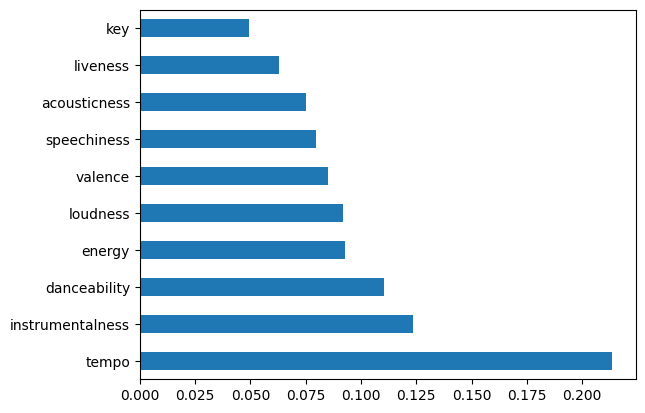

In [56]:
#feature importance using extra tree classifier
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

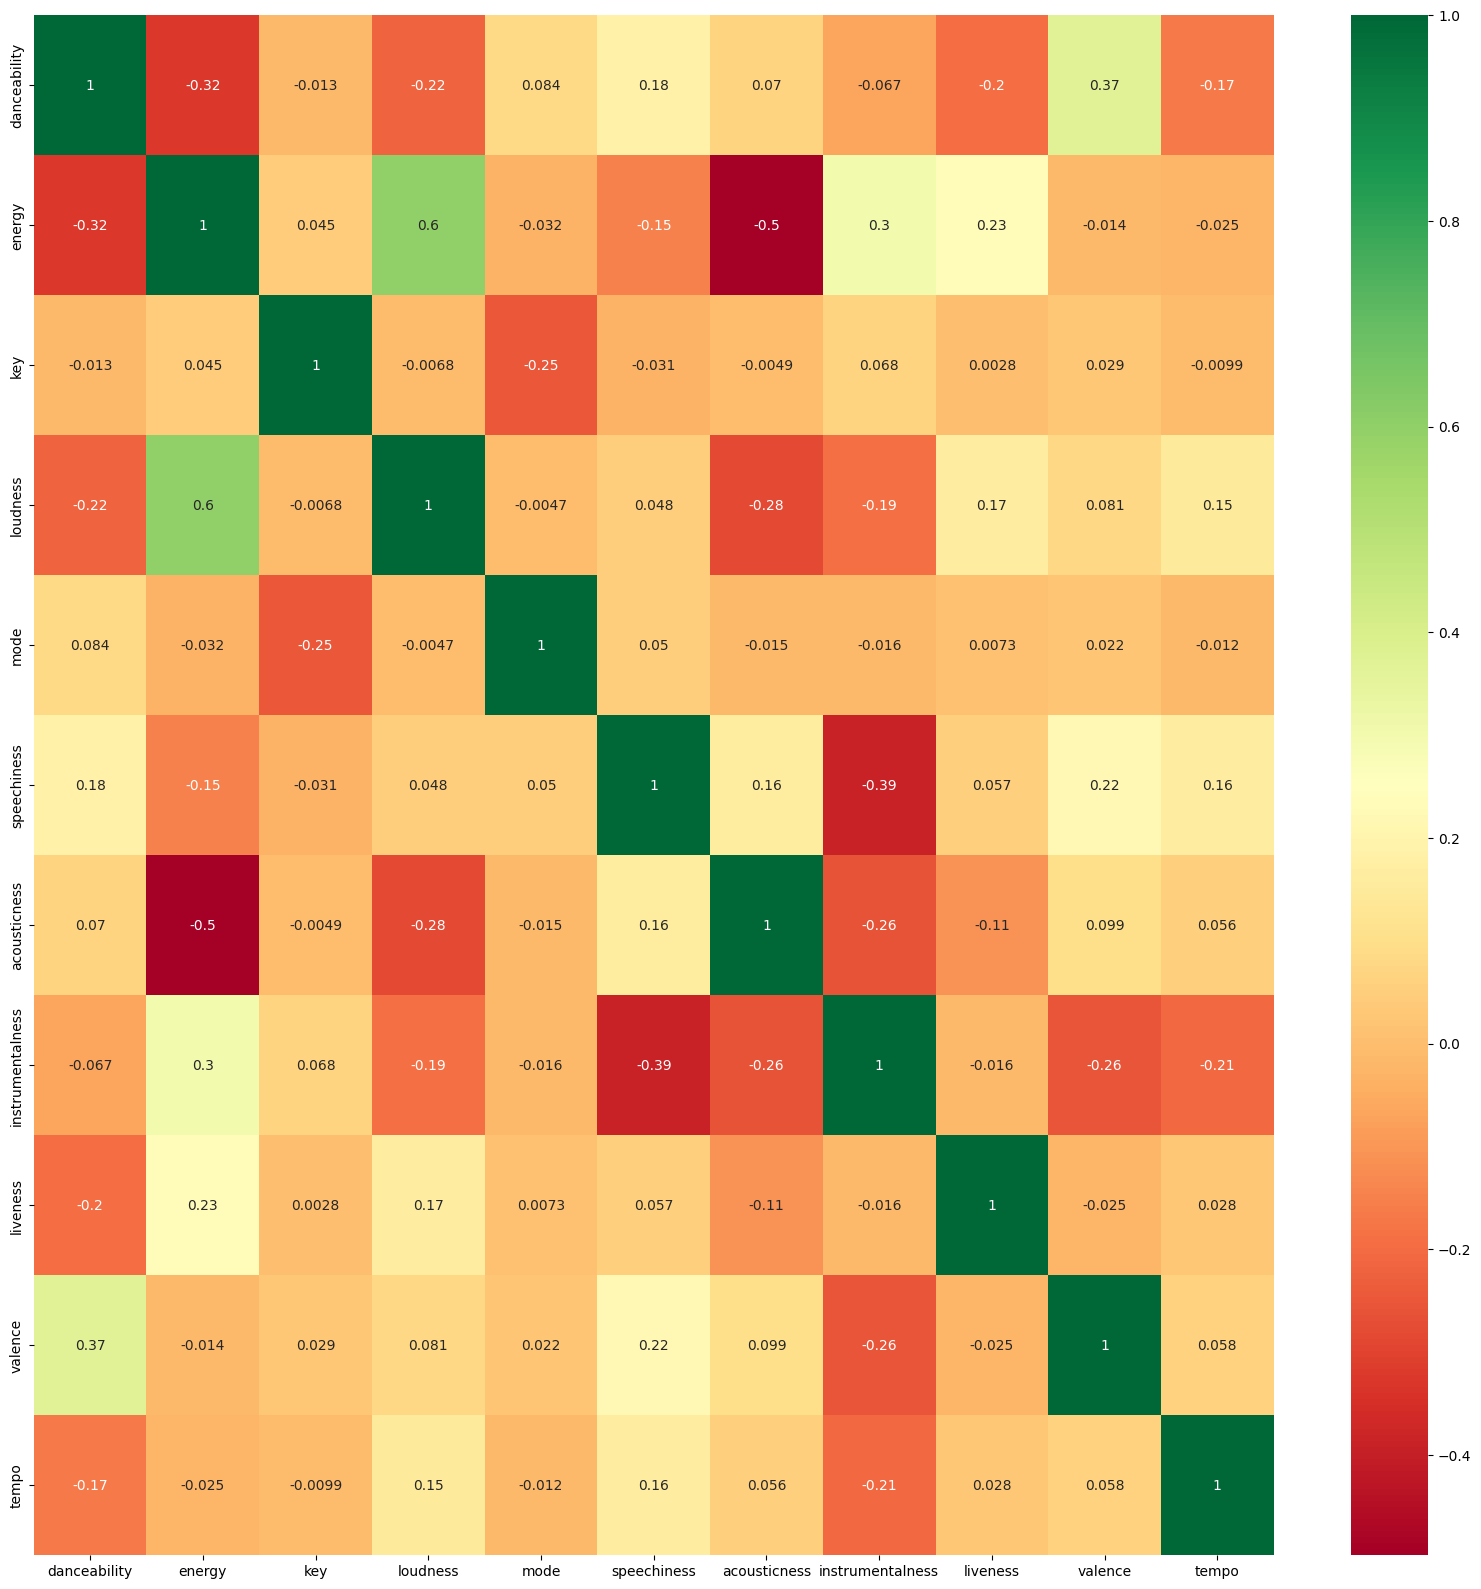

In [57]:
#correlation heat map
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")


In [65]:
df=pd.concat([X,y],axis=1)

In [66]:
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,0.829884,0.813955,0.181818,0.712039,1.0,0.430304,0.060525,0.013549,0.045943,0.382028,0.610006,Dark Trap
1,0.708527,0.492877,0.727273,0.715710,1.0,0.061410,0.405870,0.000000,0.109792,0.108635,0.351848,Dark Trap
2,0.850471,0.892974,0.454545,0.782742,1.0,0.042890,0.013967,0.000004,0.369692,0.021046,0.986200,Dark Trap
3,0.445227,0.780947,0.000000,0.784742,1.0,0.086971,0.023987,0.000000,0.105699,0.161250,0.794595,Dark Trap
4,0.794127,0.623909,0.181818,0.703712,1.0,0.292754,0.219635,0.000000,0.158907,0.590426,0.554579,Dark Trap
...,...,...,...,...,...,...,...,...,...,...,...,...
42300,0.501571,0.692925,0.363636,0.772743,1.0,0.008340,0.031882,0.000349,0.112862,0.387187,0.567055,hardstyle
42301,0.489652,0.767944,0.000000,0.696754,0.0,0.027293,0.022772,0.000018,0.198813,0.375838,0.566531,hardstyle
42302,0.320620,0.820956,0.727273,0.828791,1.0,0.030109,0.026315,0.000245,0.382994,0.108635,0.597377,hardstyle
42303,0.446311,0.920981,0.545455,0.782906,0.0,0.017871,0.000557,0.029929,0.047887,0.484164,0.567233,hardstyle


In [67]:
from pycaret.classification import *
s=setup(df,target='genre')

,Description,Value
0,Session id,7235
1,Target,genre
2,Target type,Multiclass
3,Target mapping,"Dark Trap: 0, Emo: 1, Hiphop: 2, Pop: 3, Rap: 4, RnB: 5, Trap Metal: 6, Underground Rap: 7, dnb: 8, hardstyle: 9, psytrance: 10, techhouse: 11, techno: 12, trance: 13, trap: 14"
4,Original data shape,"(42305, 12)"
5,Transformed data shape,"(42305, 12)"
6,Transformed train set shape,"(29613, 12)"
7,Transformed test set shape,"(12692, 12)"
8,Numeric features,11
9,Preprocess,True
